In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from prettytable import PrettyTable as ptbl

ModuleNotFoundError: No module named 'prettytable'

In [8]:
def GaussSiedelMethod(a,x,B,N,E):
    
    # Copying input arguments into local arguments to avoid data Over-writing
    A = copy.copy(a)
    X = copy.copy(x)
    b = copy.copy(B)
    n = copy.copy(N)
    e = copy.copy(E)
    
    print("\n***** Gauss-Siedel Method *****")

    # List to hold column titles for Making table
    lst = []
    lst.append('Iteration')
    for i in range(n):
        lst.append('x'+str(i+1))
    
    # List to hold data which is to be displayed in table
    outputlist=[]

    condition = True
    count = 0
    error = []
    # List to hold data which is to be used to plot graph i.e. iteration count and corresponding accuracy
    accuracy = []

    while condition:
        X_prev = copy.copy(X)
        X_new = np.zeros((n))
        for i in range(n):
            
            for j in range (i):
                X[j] = copy.copy(X_new[j])
            
            tmp = 0
            for j in range(n):
                if(i!=j):
                    tmp += A[i][j]*X[j]
            X_new[i] = (b[i] - tmp)/A[i][i]
            esum = 0
            for i in range(n):
                esum += (X_new[i]-X_prev[i])**(2)
            
            error.append(esum)
        temp = []
        temp.append(count+1)
        print(f'Iteration = {count}',end="\t")
        for i in range(n):
            print(f'  x{i+1} = {X_new[i]:.6f}', end = "\t")
            temp.append(X_new[i])
        print()
        
        outputlist.append(temp)         # Adding data to outputlist (for making table)
        
        accuracyReached = abs(X_new[i] - X_prev[i])
        for i in range(1,n):
            accuracyReached = max(accuracyReached,abs(X_new[i] - X_prev[i])) 
        
        accuracy.append([count+1,accuracyReached])      # Adding data to accuracy list (for plotting graphs)
                
        count += 1
        condition = False
        for i in range(n):
            X[i] = copy.copy(X_new[i])
        if accuracyReached>e:
            condition = True

    # Making Table and pushing data in it
    table = ptbl(lst)
    for i in outputlist:
            table.add_row(i)

    # Printing Result
    print(f'\nSolution: Iteration = {count}')
    for i in range(n):
        print(f'x{i+1} = {X[i]:.6f}', end = "\t")
    print()
    print(error)
    return accuracy, table

In [9]:
n = 3
A = np.array([[7.0,1.,1.],[-3.,7.,-1.],[-2.,5.,9.]])
b = np.array([[6.],[-26.],[1.]])
X = np.array([0,0.5,1.])
e = 0.0001
GaussSiedelMethod(A,X,b,n,e)


***** Gauss-Siedel Method *****
Iteration = 0	  x1 = 0.642857	  x2 = -3.295918	  x3 = 2.085034	
Iteration = 1	  x1 = 1.030126	  x2 = -2.974941	  x3 = 1.992773	
Iteration = 2	  x1 = 0.997453	  x2 = -3.002124	  x3 = 2.000614	
Iteration = 3	  x1 = 1.000216	  x2 = -2.999820	  x3 = 1.999948	
Iteration = 4	  x1 = 0.999982	  x2 = -3.000015	  x3 = 2.000004	
Iteration = 5	  x1 = 1.000002	  x2 = -2.999999	  x3 = 2.000000	

Solution: Iteration = 6
x1 = 1.000002	x2 = -2.999999	x3 = 2.000000	
[1.6632653061224492, 15.822261557684296, 15.99956036836503, 15.360422150256742, 4.600370738440637, 0.26151598172001533, 12.822486030367294, 3.9729510212200503, 0.0018679811090663687, 13.015213596514926, 4.002469326937868, 1.3388960651614915e-05, 12.99871042566368, 3.9997914769354814, 9.617662973652252e-08, 13.000109450481752, 4.000017718907939, 6.918159974404965e-10]


([[1, 3.7959183673469385],
  [2, 0.3209773705400525],
  [3, 0.02718318110714124],
  [4, 0.00230435216883329],
  [5, 0.00019546285733484936],
  [6, 1.658623573641549e-05]],
 [1.6632653061224492,
  15.822261557684296,
  15.99956036836503,
  15.360422150256742,
  4.600370738440637,
  0.26151598172001533,
  12.822486030367294,
  3.9729510212200503,
  0.0018679811090663687,
  13.015213596514926,
  4.002469326937868,
  1.3388960651614915e-05,
  12.99871042566368,
  3.9997914769354814,
  9.617662973652252e-08,
  13.000109450481752,
  4.000017718907939,
  6.918159974404965e-10])

In [10]:
gs,table = GaussSiedelMethod(A,X,b,n,e)

gs_count = []
gs_accuracy =[] 
for i in gs:
    gs_count.append(i[0])
    gs_accuracy.append(i[1])


***** Gauss-Siedel Method *****
Iteration = 0	  x1 = 0.642857	  x2 = -3.295918	  x3 = 2.085034	
Iteration = 1	  x1 = 1.030126	  x2 = -2.974941	  x3 = 1.992773	
Iteration = 2	  x1 = 0.997453	  x2 = -3.002124	  x3 = 2.000614	
Iteration = 3	  x1 = 1.000216	  x2 = -2.999820	  x3 = 1.999948	
Iteration = 4	  x1 = 0.999982	  x2 = -3.000015	  x3 = 2.000004	
Iteration = 5	  x1 = 1.000002	  x2 = -2.999999	  x3 = 2.000000	

Solution: Iteration = 6
x1 = 1.000002	x2 = -2.999999	x3 = 2.000000	
[1.6632653061224492, 15.822261557684296, 15.99956036836503, 15.360422150256742, 4.600370738440637, 0.26151598172001533, 12.822486030367294, 3.9729510212200503, 0.0018679811090663687, 13.015213596514926, 4.002469326937868, 1.3388960651614915e-05, 12.99871042566368, 3.9997914769354814, 9.617662973652252e-08, 13.000109450481752, 4.000017718907939, 6.918159974404965e-10]


ValueError: too many values to unpack (expected 2)

In [15]:
print(table)

+-----------+-----------------------+--------------------+--------------------+
| Iteration |           x1          |         x2         |         x3         |
+-----------+-----------------------+--------------------+--------------------+
|     1     |          0.6          | 1.3800000000000001 | 2.9379999999999997 |
|     2     |  -0.5040000000000001  | 0.7905999999999999 |      2.87906       |
|     3     | -0.032479999999999884 | 1.1619220000000001 | 2.9161922000000002 |
|     4     |  -0.3295376000000001  |     0.92798914     |    2.892798914     |
|     5     |      -0.142391312     |    1.0753668418    |   2.90753668418    |
|     6     |     -0.26029347344    |   0.982518889666   |  2.8982518889666   |
|     7     |    -0.1860151117328   |  1.04101309951042  | 2.904101309951042  |
|     8     |  -0.23281047960833606 | 1.0041617473084354 | 2.900416174730844  |
|     9     |  -0.20332939784674836 | 1.0273780991956856 | 2.902737809919569  |
|     10    |  -0.22190247935654844 | 1.

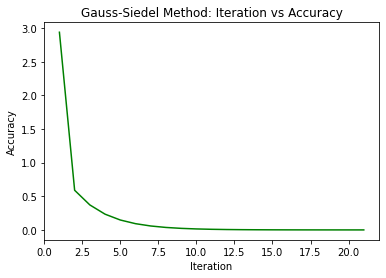

In [16]:
plt.title("Gauss-Siedel Method: Iteration vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Iteration")
plt.plot(gs_count,gs_accuracy,color = 'green')
plt.show()
